LINEAR REGRESSION

In [1]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)

In [2]:
#Load Dataset
carslm = pd.read_csv('./carslm.csv')
dfnew = carslm.drop('id',axis=1)
dfnew.head()

speed  dist
0      4     2
1      4    10
2      7     4
3      7    22
4      8    16

In [3]:
#Show Key Statistics
dfnew.describe()

speed        dist
count  50.000000   50.000000
mean   15.400000   42.980000
std     5.287644   25.769377
min     4.000000    2.000000
25%    12.000000   26.000000
50%    15.000000   36.000000
75%    19.000000   56.000000
max    25.000000  120.000000

In [4]:
#Overview of Dataset Characteristics
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
speed    50 non-null int64
dist     50 non-null int64
dtypes: int64(2)
memory usage: 880.0 bytes


In [5]:
#Summary of N/A Values
dfnew.isnull().sum()

speed    0
dist     0
dtype: int64

In [6]:
#Review Correlation between Variables
dfnew.corr()

speed      dist
speed  1.000000  0.806895
dist   0.806895  1.000000

In [7]:
#Define X and y Variables
X = dfnew['speed'].values
y = dfnew['dist'].values

In [8]:
#Load Library and Split Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=100)

In [9]:
#Create Model
#Script for Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

In [10]:
#Converting Variables to 2D
X_train2 = X_train.reshape(-1,1)
X_test2 = X_test.reshape(-1,1)

In [11]:
#Create Model
for name, method in [('Linear Regression', LinearRegression())]:
    method.fit(X_train2,y_train)
    predict = method.predict(X_test2)

print ('Method: %s' %name)

#Coefficients
print('Intercept: %.2f'% method.intercept_)
print('Coefficient: %.2f'% method.coef_)

Method: Linear Regression
Intercept: -15.64
Coefficient: 3.81


In [12]:
#MAE, MSE and RMSE
print('R2: %.2f'% r2_score(y_test, predict))
print('Mean Absolute Error: %.2f'% metrics.mean_absolute_error(y_test, predict))
print('Mean Squared Error: %.2f'% metrics.mean_squared_error(y_test, predict))
print('Root Mean Squared Error: %.2f'% np.sqrt(metrics.mean_squared_error(y_test, predict)))

R2: 0.79
Mean Absolute Error: 8.80
Mean Squared Error: 121.11
Root Mean Squared Error: 11.01


MULTIPLE REGRESSION

In [13]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)

In [14]:
#Load Dataset
data = pd.read_csv('./mtcars.csv')
data.head()

model   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2

In [15]:
#Remove Model Column
data2 = data.drop('model', axis = 1)
data2.head()

mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  carb
0  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4     4
1  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4     4
2  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4     1
3  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3     1
4  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3     2

In [16]:
#Overview of Dataset Characteristics
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
mpg     32 non-null float64
cyl     32 non-null int64
disp    32 non-null float64
hp      32 non-null int64
drat    32 non-null float64
wt      32 non-null float64
qsec    32 non-null float64
vs      32 non-null int64
am      32 non-null int64
gear    32 non-null int64
carb    32 non-null int64
dtypes: float64(5), int64(6)
memory usage: 2.8 KB


In [17]:
#Summary of N/A Values
data2.isnull().sum()

mpg     0
cyl     0
disp    0
hp      0
drat    0
wt      0
qsec    0
vs      0
am      0
gear    0
carb    0
dtype: int64

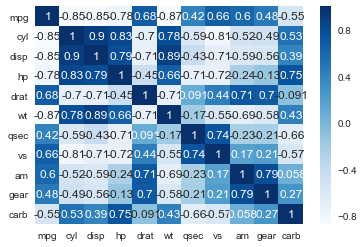

In [18]:
#Visualization of Correlations
sns.heatmap(data2.corr(), annot=True, cmap="Blues")

In [19]:
#Identify Correlated Columns
def correlation(dataset,threshold):
    col_corr=set() # set will contains unique values.
    corr_matrix=dataset.corr() #finding the correlation between columns.
    for i in range(len(corr_matrix.columns)): #number of columns
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold: #checking the correlation between columns.
                colName=corr_matrix.columns[i] #getting the column name
                col_corr.add(colName) #adding the correlated column name heigher than threshold value.
    return col_corr #returning set of column names
col=correlation(data2.drop('mpg',axis=1),0.8)
print('Correlated columns:',col)  

Correlated columns: {'vs', 'hp', 'wt', 'disp'}


In [20]:
#Build Multivariate Model
#Define X and y variables
X = data2.drop('mpg', axis = 1).values
y = data2['mpg'].values

In [21]:
#Load Library for Training Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [22]:
#Script for Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

for name, method in [('Linear Regression', LinearRegression())]:
    method.fit(X_train, y_train)
    predict = method.predict(X_test)
print('Method: %s' %name)

Method: Linear Regression


In [23]:
#Coefficients 
print('Intercept: %.2f'% method.intercept_)
coeff_table=pd.DataFrame(np.transpose(method.coef_), data2.drop('mpg', axis = 1).columns, columns =['Coefficients'])
print(coeff_table)

Intercept: -15.78
      Coefficients
cyl       1.066970
disp      0.008457
hp       -0.004587
drat      3.013895
wt       -2.461549
qsec      0.853503
vs       -0.135095
am        1.903771
gear      4.078364
carb     -1.932864


In [24]:
#MAE, MSE and RMSE
print('R2: %.2f'% r2_score(y_test, predict))
print('Mean Absolute Error: %.2f'% metrics.mean_absolute_error(y_test, predict))
print('Mean Squared Error: %.2f'% metrics.mean_squared_error(y_test, predict))
print('Root Mean Squared Error: %.2f'% np.sqrt(metrics.mean_squared_error(y_test, predict)))

R2: 0.30
Mean Absolute Error: 2.54
Mean Squared Error: 18.47
Root Mean Squared Error: 4.30


In [31]:
#Optimization Using Gridsearch
#Gridsearch

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor

#Linear Model
lm2=LinearRegression()
param_grid = {'fit_intercept':[True,False],'normalize':[True,False], 'copy_X':[True, False]}
lm2_model = GridSearchCV(lm2, param_grid, cv=10, verbose=0,scoring = 'neg_mean_squared_error',n_jobs=-1)

In [32]:
#SGD Model
sgd = SGDRegressor(max_iter=1000,random_state=100)
param_gridsgd = {'loss': ["squared_loss","huber", "epsilon_insensitive", "squared_epsilon_insensitive"],
          'penalty':["none", "l2", "l1", "elasticnet"],
          'alpha':[0.001, 0.0001, 0.00001]}
sgd_model = GridSearchCV(sgd, param_gridsgd,cv=10, verbose=0,scoring = 'neg_mean_squared_error',n_jobs=-1)

grids = [lm2_model,sgd_model] 
grid_dict = {0:'LinearReg', 1:'SGD'}

In [33]:
#Model Creation
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('Optimized Models') 

Optimized Models


In [35]:
#Fit the grid search objects 
for idx, optmodel in enumerate(grids): 
     print('\nEstimator: %s' % grid_dict[idx]) 
     #Fit grid search
     optmodel.fit(X_train, y_train) 
     #Best params 
     print('Best params: %s' % optmodel.best_params_) 
     # Predict on test data with best params 
     y_pred3 = optmodel.predict(X_test) 
     # Test data accuracy of model with best params    
     print('R2: %.2f'% r2_score(y_test, y_pred3))
     print('Intercept: %.2f'% optmodel.best_estimator_.intercept_)
     coeff_table=pd.DataFrame(np.transpose(optmodel.best_estimator_.coef_),data2.drop('mpg',axis=1).columns,
                              columns=['Coefficients'])
     print(coeff_table)
     print('Mean Absolute Error: %0.2f' % metrics.mean_absolute_error(y_test, y_pred3))  
     print('Mean Squared Error: %0.2f'% metrics.mean_squared_error(y_test, y_pred3))  
     print('Root Mean Squared Error: %0.2f'% np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))  


Estimator: LinearReg
Best params: {'copy_X': True, 'fit_intercept': False, 'normalize': True}
R2: 0.51
Intercept: 0.00
      Coefficients
cyl       0.435142
disp      0.007184
hp       -0.007941
drat      1.888977
wt       -2.427544
qsec      0.553489
vs       -0.286469
am        1.722108
gear      3.377115
carb     -1.615876
Mean Absolute Error: 2.32
Mean Squared Error: 13.01
Root Mean Squared Error: 3.61

Estimator: SGD
Best params: {'alpha': 1e-05, 'loss': 'huber', 'penalty': 'l2'}
R2: 0.36
Intercept: 0.09
      Coefficients
cyl       0.262019
disp     -0.050853
hp        0.013907
drat      0.388465
wt       -0.156018
qsec      1.235444
vs        0.049672
am        0.324991
gear      0.508551
carb     -0.237776
Mean Absolute Error: 3.31
Mean Squared Error: 16.91
Root Mean Squared Error: 4.11


In [36]:
#Prediction Example
#Prediction Dataset
raw_data = {'cyl':[6],'dist':[200], 'hp':[175], 'drat':[3.00], 'wt':[2.800], 'qsec':[17.00],
           'vs':[1], 'am':[0], 'gear':[4], 'carb':[4]}

dfnew=pd.DataFrame(raw_data, columns=['cyl','dist','hp','drat','wt','qsec','vs','am','gear','carb'])

dfnew

cyl  dist   hp  drat   wt  qsec  vs  am  gear  carb
0    6   200  175   3.0  2.8  17.0   1   0     4     4

In [37]:
#Prediction
print("Predicted mpg - Linear Model: %0.2f" % lm2_model.predict(dfnew))
print("Predicted mpd - SGD Model: %0.2f" % sgd_model.predict(dfnew))

Predicted mpg - Linear Model: 17.70
Predicted mpd - SGD Model: 16.79
